# Part A (Analysis of the Given Dataset)

Dataset Description: Titanic Dataset

![](https://cdn.pixabay.com/photo/2021/03/04/16/32/ship-6068668_1280.png)

Data Dictionary:


1.	'Survival': 0 = No, 1 = Yes
2.	'Pclass': Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
3.	'Sex': Sex
4.	'Age': Age in years
5.	'SibSp':  siblings/spouses aboard 
6.	'Parch':  parents/children aboard 
7.	'Ticket': Ticket number
8.	'Fare': Passenger fare
9.	'Cabin': Cabin number
10.	'Embarked': Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton


The data has been split into two groups:
1.	training set (train.csv)
2.	test set     (test.csv)

\\
The training set should be used to build your machine-learning models. 

The test set should be used to see how well your model performs on unseen data.







## 1. Provide an overview of the given Dataset including the Dataset Characteristics and Exploratory Data Analysis, data preprocessing and performance of different ML models. This section should be written after completing Part A. 

**Write Here**

This dataset is about titanic dataset where has 12 columns and 1309 rows.There were some missing values. Cabin had 1014,age had 263, Embarked had 2 and fare had 1 missing values.In this dataset total male has 843 and female has 466.If we percentage this, 64.4% is male and 35.5% is female. 1st class passengers are 323,2nd class are 277 and 709 are 3rd class passengers. There are 50% female and 13% male passengers who could servied. Fortunately Southampton passengers are more servived than Cherbourd and Queenstown.Unfortunaltely Southampton passengers most could not servied.

## 2.	Dataset Characteristics and Exploratory Data Analysis

In this section, introduce your dataset. Mention number of rows, columns and other characteristics. Provide the histograms of data distribution and correlations among the variable (hints: heatmap, groupby, etc) with a suitable discussion. Try to stand out and be creative. (Add as many cells as you need). Note, we will be watching for copy-paste here.

### 2.1 Load, view data and show analysis on data. Be creative. Investigate like a detective.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy import stats

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/Projects/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Projects/test.csv')
gender_data = pd.read_csv('/content/drive/MyDrive/Projects/gender_submission.csv')

In [ ]:
display('Train Data:',train_data.head(), 'Test Data:',test_data.head(), 'Gender Data:',gender_data.head())

'Train Data:'

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


'Test Data:'

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


'Gender Data:'

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
# Merging gender table and test table to dataframe 'gender_test'
left = gender_data
right = test_data

gender_test = pd.merge(left, right, on=["PassengerId"])
gender_test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
# Merging the created dataframe 'gender_test' to the existing dataframe 'train_data'
df2 = pd.concat([train_data, gender_test])
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
#Show all column names
df=pd.concat([train_data,gender_test])
list(df.columns)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [ ]:
# Overview about Columns, Range, Non-Null Value Counts, Memory Usage and Data Types (#df.dtpyes)
df=pd.concat([train_data,gender_test])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


In [ ]:
# Count rows and coulums
df.shape


(1309, 12)

In [ ]:
# Total cells in the dataset
total_cells=np.product(df.shape)
total_cells

15708

### 2.2 Data Cleaning









#### Identifying duplicate values


In [ ]:
# Code Here 
df.duplicated().sum()

0

#### Identifying missing values


In [ ]:
# Find the amount of missing values in each column
df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [ ]:
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]
for feature in features_with_na:
  print(feature, np.round(df[feature].isnull().mean(),2),'% missing values')


Age 0.2 % missing values
Cabin 0.77 % missing values
Embarked 0.0 % missing values


#### Visualisation of missing data


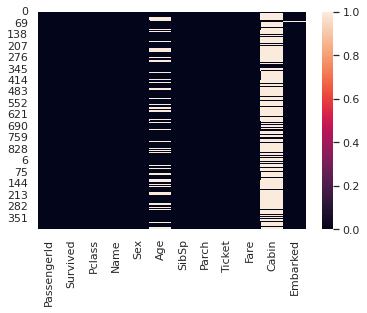

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(df.isna())
plt.show()


#### Dealing with missing values. Fix the missing value problem.



1.   Do analysis using plots. Fix issues.

2.   Provide an appropriate discussion




In [ ]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Number
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,0


In [ ]:
df["Age"].fillna(df["Age"].mean(), inplace=True)
df["Cabin"].fillna(df["Cabin"].mode()[0], inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

 ##### Discuss your findings

### 2.3 Analysing Patterns using Visualisations

The data type of 'Sex' is an object, which will not be visible in a correlation. So, if we like to include the values of the column 'Sex' into the correlation matrix by creating a new column 'Sex_Number' and set the value 'female' to '1' and 'male' to '0'. 

In [ ]:
# Creating a new column 'SexNo' with the values '1' for 'female' and '0' for 'male'
df['Sex_Number'] = np.where((df['Sex'] == "female"), 1, 0)
# Checking if the column 'SexNo' has been added
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Number
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C23 C25 C27,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C23 C25 C27,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C23 C25 C27,S,0


#### 2.3.1 Visualization of column correlation (use groupby). Also, plot Heat Map

In [ ]:
# Correlation table including the new column 'SexNo'
correlation = df.corr()
correlation

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_Number
PassengerId,1.000000,-0.020370,-0.038354,0.028814,-0.055224,0.008942,0.031428,-0.013406
Survived,-0.020370,1.000000,-0.264710,-0.053695,0.002370,0.108919,0.233622,0.688371
Pclass,-0.038354,-0.264710,1.000000,-0.408106,0.060832,0.018322,-0.558629,-0.124617
Age,0.028814,-0.053695,-0.408106,1.000000,-0.243699,-0.150917,0.178740,-0.063645
SibSp,-0.055224,0.002370,0.060832,-0.243699,1.000000,0.373587,0.160238,0.109609
Parch,0.008942,0.108919,0.018322,-0.150917,0.373587,1.000000,0.221539,0.213125
Fare,0.031428,0.233622,-0.558629,0.178740,0.160238,0.221539,1.000000,0.185523
Sex_Number,-0.013406,0.688371,-0.124617,-0.063645,0.109609,0.213125,0.185523,1.000000


Correlation heatmaps are a type of plot that visualize the strength of relationships between numerical variables. Correlation plots are used to understand which variables are related to each other and the strength of this relationship.

**seaborn.heatmap**

Plot rectangular data as a color-encoded matrix.

This is an Axes-level function and will draw the heatmap into the currently-active Axes if none is provided to the ax argument. Part of this Axes space will be taken and used to plot a colormap, unless cbar is False or a separate Axes is provided to cbar_ax.

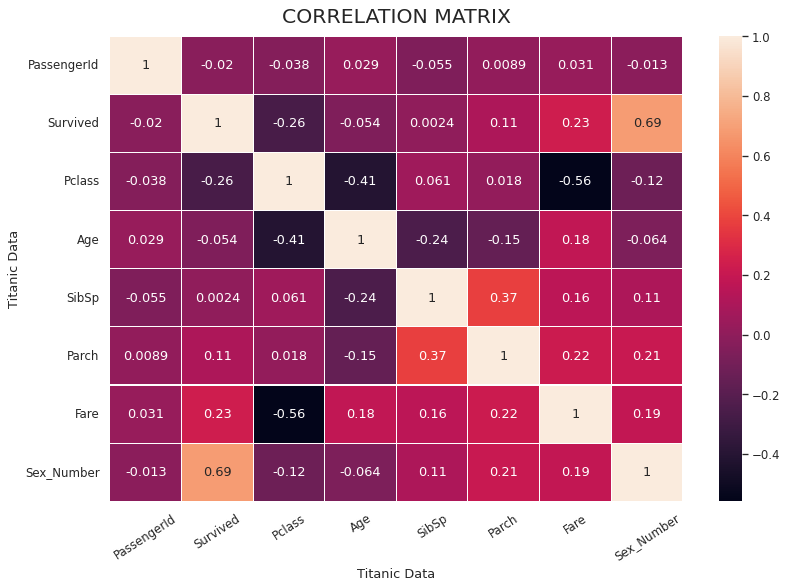

In [ ]:
# Visualisation of the corralation table


plt.figure(figsize=(12,8), dpi=77)
sns.heatmap(correlation, linecolor='white',linewidths=0.1, annot=True)
plt.title('Correlation Matrix'.upper(), size=19, pad=13)
plt.xlabel('Titanic Data')
plt.ylabel('Titanic Data')
plt.xticks(rotation=33)
plt.show()

 The correlation matrix is a table that shows the correlation between different variables in a dataset. It help us understanding how the variables in the dataset are related to each other, and can help in identifying patterns and relationships that may not be immediately apparent.

In this dataset, the correlation matrix shows how different variables, are related to eatch other. For example, the matrix shows a strong positive correlation between survival and Sex_Number or a negative correlation between survival and pclass.



#### 2.3.2 Visualization of column relationships (Categorical Variables)



1.   Comparing two columns using different types of plots
2.   Comparing multiple columns using different types of plots



##### 2.3.2.1 Sex Proportion

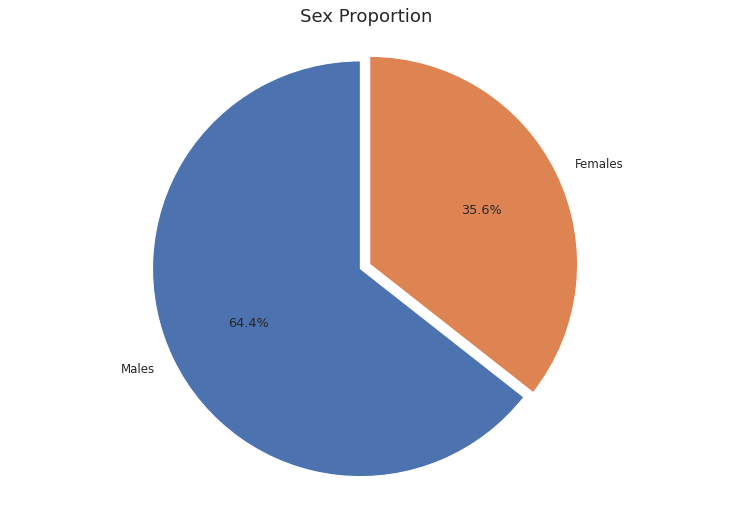

In [ ]:
male = (df['Sex'] == 'male').sum()
female = (df['Sex']== 'female').sum()
proportions = [male,female]

plt.figure(figsize=(12,8), dpi=77)
plt.pie(proportions, data=df, labels= ['Males', 'Females'], explode = (0.05,0), startangle=90, autopct='%1.1f%%', shadow=False)
plt.axis('equal')
plt.title("Sex Proportion", size=17, pad=13)
plt.show()

 What do you undersend/find from the analysis above (section 2.3.2.1)? Write in your own words in this cell.

Write below:

This pie chart here shows us the proportion between male and female or the gender poprtion in the titanic.


##### 2.3.2.2 Age comparision of the people who survived and those who died

In [ ]:
# How many people survived ('Survived' == 0)
survived_data=df.Survived.value_counts().to_frame()
survived_data

,Survived
0,815
1,494


In [ ]:
pd.pivot_table(df, index="Survived", values=['Pclass','SibSp', 'Parch', 'Fare'])

,Fare,Parch,Pclass,SibSp
Survived,,,,
0,23.879124,0.311656,2.467485,0.496933
1,48.811497,0.506073,2.010121,0.502024


In [ ]:
# Amount and average age of people who survived compared to those who died.
df.groupby(['Survived']).Age.agg([len,min, max,'mean', 'median'])

,len,min,max,mean,median
Survived,,,,,
0,815,0.33,74.0,30.510986,28.0
1,494,0.17,80.0,28.931079,28.0


In [ ]:
fem_p1_s0 =df.loc[(df.Sex == 'female') & (df.Pclass == 1) & (df.SibSp == 0)].Age.median()
fem_p1_s1 =df.loc[(df.Sex == 'female') & (df.Pclass == 1) & (df.SibSp == 1)].Age.median()
fem_p1_s2 =df.loc[(df.Sex == 'female') & (df.Pclass == 1) & (df.SibSp == 2)].Age.median()
fem_p1_s3 =df.loc[(df.Sex == 'female') & (df.Pclass == 1) & (df.SibSp == 3)].Age.median()
fem_p2_s0 =df.loc[(df.Sex == 'female') & (df.Pclass == 2) & (df.SibSp == 0)].Age.median()
fem_p2_s1 =df.loc[(df.Sex == 'female') & (df.Pclass == 2) & (df.SibSp == 1)].Age.median()
fem_p2_s2 =df.loc[(df.Sex == 'female') & (df.Pclass == 2) & (df.SibSp == 2)].Age.median()
fem_p2_s3 =df.loc[(df.Sex == 'female') & (df.Pclass == 2) & (df.SibSp == 3)].Age.median()
fem_p3_s0 =df.loc[(df.Sex == 'female') & (df.Pclass == 3) & (df.SibSp == 0)].Age.median()
fem_p3_s1 =df.loc[(df.Sex == 'female') & (df.Pclass == 3) & (df.SibSp == 1)].Age.median()
fem_p3_s2 =df.loc[(df.Sex == 'female') & (df.Pclass == 3) & (df.SibSp == 2)].Age.median()
fem_p3_s3 =df.loc[(df.Sex == 'female') & (df.Pclass == 3) & (df.SibSp == 3)].Age.median()
fem_p3_s4 =df.loc[(df.Sex == 'female') & (df.Pclass == 3) & (df.SibSp == 4)].Age.median()
fem_p3_s5 =df.loc[(df.Sex == 'female') & (df.Pclass == 3) & (df.SibSp == 5)].Age.median()
fem_p3_s8 =df.loc[(df.Sex == 'female') & (df.Pclass == 3) & (df.SibSp == 8)].Age.median()
male_p1_s0 =df.loc[(df.Sex == 'male') & (df.Pclass == 1) & (df.SibSp == 0)].Age.median()
male_p1_s1 =df.loc[(df.Sex == 'male') & (df.Pclass == 1) & (df.SibSp == 1)].Age.median()
male_p1_s2 =df.loc[(df.Sex == 'male') & (df.Pclass == 1) & (df.SibSp == 2)].Age.median()
male_p1_s3 =df.loc[(df.Sex == 'male') & (df.Pclass == 1) & (df.SibSp == 3)].Age.median()
male_p2_s0 =df.loc[(df.Sex == 'male') & (df.Pclass == 2) & (df.SibSp == 0)].Age.median()
male_p2_s1 =df.loc[(df.Sex == 'male') & (df.Pclass == 2) & (df.SibSp == 1)].Age.median()
male_p2_s2 =df.loc[(df.Sex == 'male') & (df.Pclass == 2) & (df.SibSp == 2)].Age.median()
male_p3_s0 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 0)].Age.median()
male_p3_s1 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 1)].Age.median()
male_p3_s2 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 2)].Age.median()
male_p3_s3 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 3)].Age.median()
male_p3_s4 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 4)].Age.median()
male_p3_s5 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 5)].Age.median()
male_p3_s6 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 6)].Age.median()
male_p3_s8 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 8)].Age.median()

# Filling missing values with average age of women and men in each class
def myfunc(age, pclass, sex, SibSp):
    if pd.isnull(age) and pclass==1 and sex == 'female' and SibSp == 0:
        age=fem_p1_s0
    elif pd.isnull(age) and pclass==1 and sex == 'female' and SibSp == 1:
        age=fem_p1_s1
    elif pd.isnull(age) and pclass==1 and sex == 'female' and SibSp == 2:
        age=fem_p1_s2
    elif pd.isnull(age) and pclass==1 and sex == 'female' and SibSp == 3:
        age=fem_p1_s3      
    elif pd.isnull(age) and pclass==2 and sex == 'female' and SibSp == 0:
        age=fem_p2_s0
    elif pd.isnull(age) and pclass==2 and sex == 'female' and SibSp == 1:
        age=fem_p2_s1
    elif pd.isnull(age) and pclass==2 and sex == 'female' and SibSp == 2:
        age=fem_p2_s2
    elif pd.isnull(age) and pclass==2 and sex == 'female' and SibSp == 3:
        age=fem_p2_s3
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 0:
        age=fem_p3_s0
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 1:
        age=fem_p3_s1
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 2:
        age=fem_p3_s2
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 3:
        age=fem_p3_s3
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 4:
        age=fem_p3_s4
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 5:
        age=fem_p3_s5  
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 8:
        age=df.Age.median()  
    elif pd.isnull(age) and pclass==1 and sex == 'male' and SibSp == 0:
        age=male_p1_s0
    elif pd.isnull(age) and pclass==1 and sex == 'male' and SibSp == 1:
        age=male_p1_s1
    elif pd.isnull(age) and pclass==1 and sex == 'male' and SibSp == 2:
        age=male_p1_s2
    elif pd.isnull(age) and pclass==1 and sex == 'male' and SibSp == 3:
        age=male_p1_s3      
    elif pd.isnull(age) and pclass==2 and sex == 'male' and SibSp == 0:
        age=male_p2_s0
    elif pd.isnull(age) and pclass==2 and sex == 'male' and SibSp == 1:
        age=male_p2_s1
    elif pd.isnull(age) and pclass==2 and sex == 'male' and SibSp == 2:
        age=male_p2_s2   
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 0:
        age=male_p3_s0
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 1:
        age=male_p3_s1
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 2:
        age=male_p3_s2
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 3:
        age=male_p3_s3
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 4:
        age=male_p3_s4
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 5:
        age=male_p3_s5
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 6:
        age=male_p3_s6
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 8:
        age=male_p3_s8 
    else:
        age=age
    return age

In [ ]:
# Creating a new columns 'Age_Filled_Na' with the new average age values 
df['Age_Filled'] = df.apply(lambda x: myfunc(x['Age'], x['Pclass'], x['Sex'], x['SibSp']), axis=1)

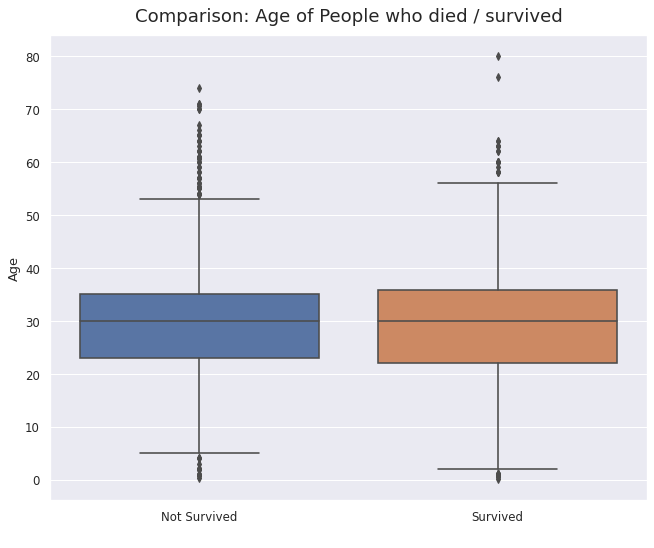

In [ ]:
# Age comparision of the people who survived and those who died using a boxplot. 
plt.figure(figsize=(10,8), dpi=77)
sns.boxplot(x="Survived", y="Age_Filled", data=df)
plt.title("Comparison: Age of People who died / survived", size=17, pad=13)
plt.ylabel('Age')
plt.xlabel(' ')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()

From this section we can understand that the number of surviverd prople and not survived have same range of age. It indicated that age was not a significant criteria to save people.

##### 2.3.2.3 The barplot compares the survival 

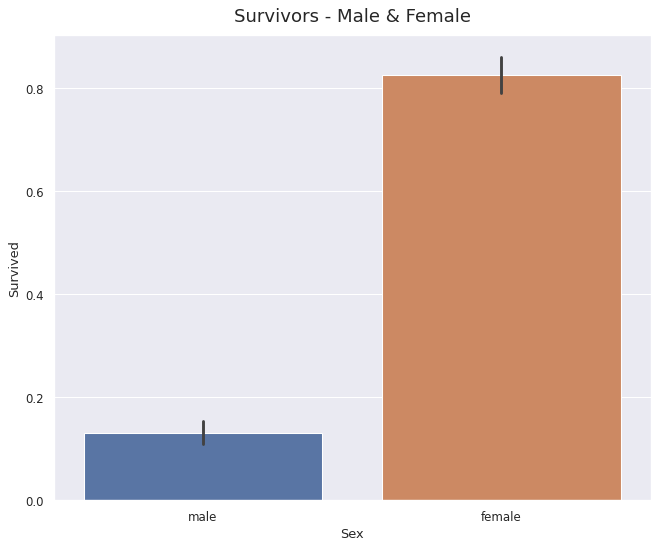

In [ ]:
plt.figure(figsize=(10,8), dpi=77)
sns.barplot(x="Sex", y="Survived", data=df)
plt.title("Survivors - Male & Female", size=17, pad=13 )
plt.show()


This section show us that the gender was big issue while saving people. This barplot show us most of the passenger that were saved are female. In comparison few male has been saved.

##### 2.3.2.4 Comparison: Survivors - Male & Female

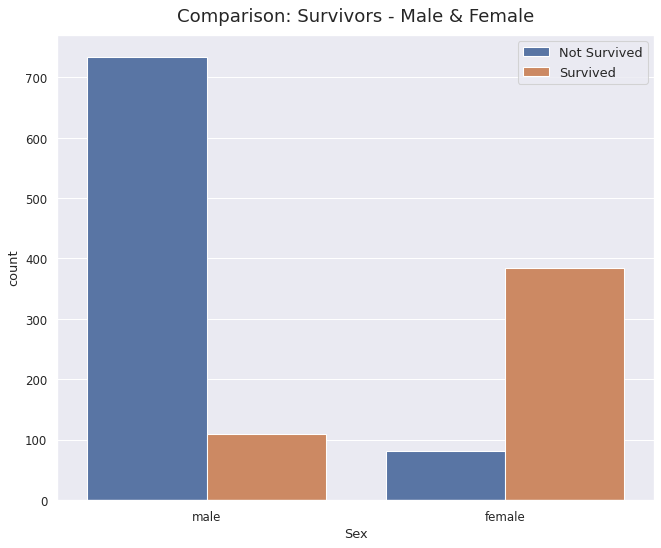

In [ ]:
plt.figure(figsize=(10,8), dpi=77)
sns.countplot(x=df['Sex'],hue=df['Survived'])
plt.title("Comparison: Survivors - Male & Female", size=17, pad= 13)
plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 12})
plt.show()

This barplot shows us the ratio of surviving and not surviving ratio of both male and female. We can see male has les surviving ratio and female have high survivng ratio. Mean Based on gender most of the saved passenger are female.

In [3]:
# Find percentage of women who survived


In [4]:
# Find percentage of men who survived

##### 2.3.2.5 Compares the chance of survival for each ticket class

In [ ]:
df['Pclass'].value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

In [ ]:
df.groupby(['Pclass', 'Survived']).Age.agg([len])

len
Pclass Survived     
1      0         137
       1         186
2      0         160
       1         117
3      0         518
       1         191

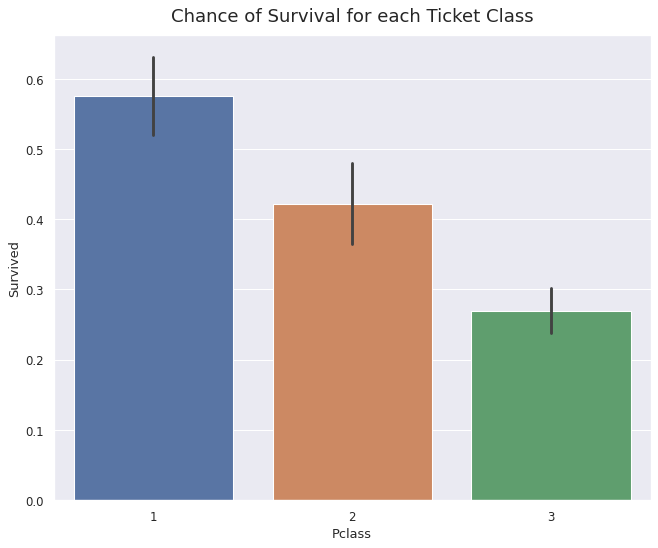

In [ ]:
plt.figure(figsize=(10,8), dpi=77)
sns.barplot(x="Pclass", y="Survived", data=df)
plt.title("Chance of Survival for each Ticket Class", size=17, pad=13)
plt.show()

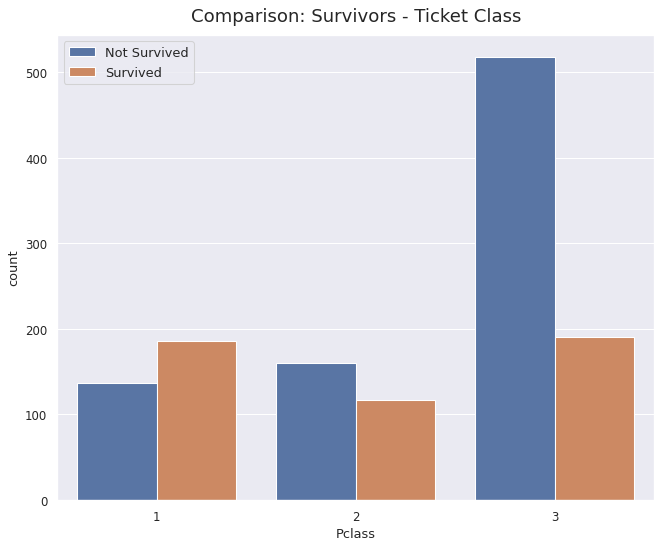

In [ ]:
# Survived and not survived compared for each ticket class
plt.figure(figsize=(10,8), dpi=77)
sns.countplot(x=df['Pclass'],hue=df['Survived'])
plt.title("Comparison: Survivors - Ticket Class", size=17, pad=13)
plt.legend(['Not Survived', 'Survived'], loc='upper left', prop={'size': 12})
plt.show()

 What do you undersend/find from the analysis above (section 2.3.2.5)? Write in your own words in this cell.

Write below:

From this analysis we can say that with first class ticket there is higher chance of surviving then the second or third class. As we can see the ratio of surviving is higher than not surviving in first class, and not survivng is little bit higher than surviving in the second class ticket but in the third class ticket not surviving is much higher than surviving. So, finally we can say that the passengers of first class has higher priority over the other class ticket passengers. Hench, their rate of surviving is higher in the first class ticket.

##### 2.3.2.6 Chance of Survival for Passengers with Parents or Children

In [ ]:
# Amount and average age of women and man of each class who survived compared to those who died.
df.groupby(['Sex','Survived', 'Pclass']).Age.agg([len,min, max,'mean'])

len    min   max       mean
Sex    Survived Pclass                             
female 0        1         3   2.00  50.0  25.666667
                2         6  24.00  57.0  36.000000
                3        72   2.00  48.0  25.249713
       1        1       141  14.00  76.0  36.721224
                2       100   0.92  60.0  27.060634
                3       144   0.17  63.0  24.073496
male   0        1       134   6.00  71.0  40.543031
                2       154   2.00  70.0  32.189562
                3       446   0.33  74.0  27.462699
       1        1        45   0.92  80.0  35.540571
                2        17   0.67  62.0  17.652487
                3        47   0.42  45.0  23.730856

In [ ]:
df['Parch'].value_counts().to_frame()

,Parch
0,1002
1,170
2,113
3,8
5,6
4,6
6,2
9,2


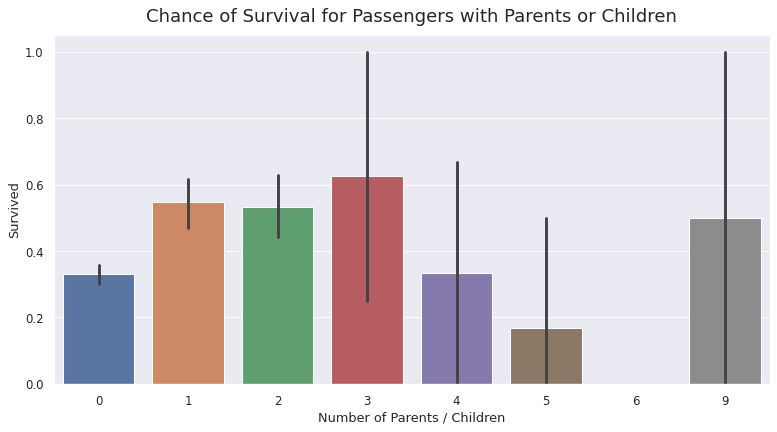

In [ ]:
plt.figure(figsize=(12,6), dpi=77)
sns.barplot(x="Parch", y="Survived", data=df)
plt.title("Chance of Survival for Passengers with Parents or Children", size=17, pad=13)
plt.xlabel('Number of Parents / Children')
plt.show()

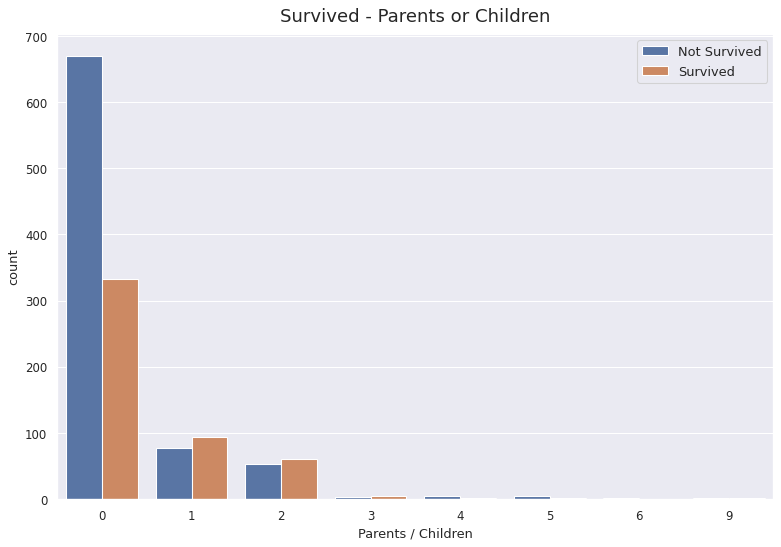

In [ ]:
plt.figure(figsize=(12,8), dpi=77)
sns.countplot(x=df['Parch'],hue=df['Survived'])
plt.title("Survived - Parents or Children", size=17, pad=12)
plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 12})
plt.xlabel('Parents / Children')
plt.show()

In [ ]:
# Age of people with parents or children
df.groupby(['Parch','Survived']).Age.agg([len, min, max])

len        min        max
Parch Survived                           
0     0         670  11.000000  74.000000
      1         332   5.000000  80.000000
1     0          77   0.750000  70.000000
      1          93   0.420000  64.000000
2     0          53   0.330000  58.000000
      1          60   0.170000  64.000000
3     0           3  16.000000  61.000000
      1           5  24.000000  54.000000
4     0           4  29.000000  64.000000
      1           2  29.881138  60.000000
5     0           5  39.000000  41.000000
      1           1  38.000000  38.000000
6     0           2  40.000000  43.000000
9     0           1  29.881138  29.881138
      1           1  29.881138  29.881138

 What do you undersend/find from the analysis above (section 2.3.2.6)? Write in your own words in this cell.

Write below:

Here we have got about the how many passengers have chanced to survive with children or parents. passesgers with 3 children or parents highly have chance to servive about 60%. At the same time low level of chance have about 20% whose are with 3 parents or children. If we count the parents or children who servived or not, there are about 445 passengers with 0 parents/children who can not servived and about 233 passengers with 0 children/parents are who servided.On the other hand , passengers with 3 parents/children about 2 passengers who can not servived and 3 passengers who servived.

##### 2.3.2.7 This barplot compares the chance of survival within a category

In [ ]:
df.SibSp.value_counts()

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64

In [ ]:
df.groupby(['SibSp','Survived']).Age.agg([len, 'mean'])

len       mean
SibSp Survived                
0     0         593  31.162045
      1         298  29.724267
1     0         153  33.035116
      1         166  28.959347
2     0          23  24.723627
      1          19  24.165443
3     0          15  16.168303
      1           5  27.600000
4     0          18   7.222222
      1           4  15.750000
5     0           5  10.200000
      1           1  10.000000
8     0           8  27.958495
      1           1  29.881138

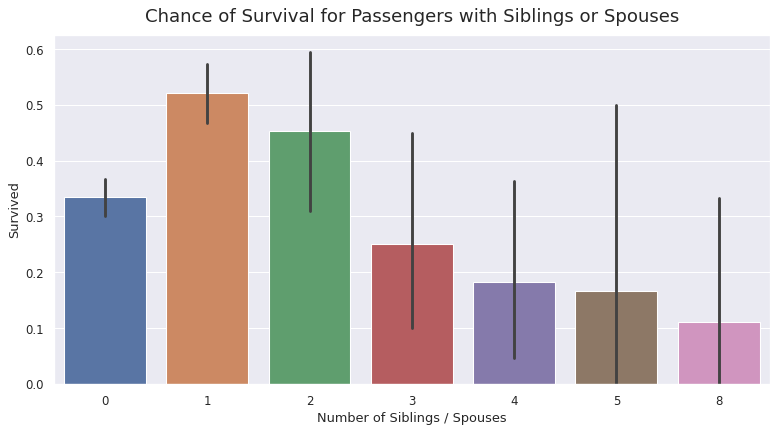

In [ ]:
# This barplot compares the chance of survival within a category
plt.figure(figsize=(12,6), dpi=77)
sns.barplot(x="SibSp", y="Survived", data=df)
plt.title("Chance of Survival for Passengers with Siblings or Spouses", size=17, pad=13)
plt.xlabel('Number of Siblings / Spouses')
plt.show()

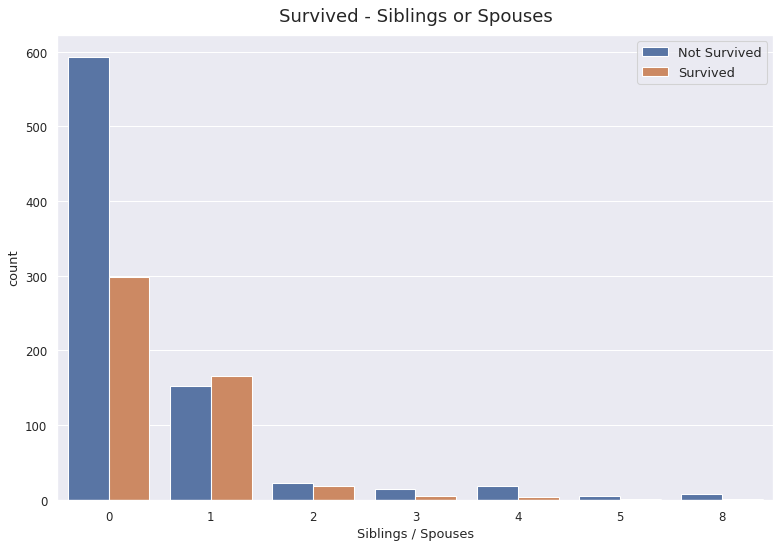

In [ ]:
plt.figure(figsize=(12,8), dpi=77)
sns.countplot(x=df['SibSp'],hue=df['Survived'])
plt.title("Survived - Siblings or Spouses", size=17, pad=13)
plt.xlabel('Siblings / Spouses')
plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 12})
plt.show()

In [ ]:
df.groupby(['SibSp','Survived']).Age.agg([len, min, max, 'mean'])

len        min        max       mean
SibSp Survived                                      
0     0         593   0.330000  74.000000  31.162045
      1         298   0.420000  80.000000  29.724267
1     0         153   0.750000  70.000000  33.035116
      1         166   0.170000  76.000000  28.959347
2     0          23   9.000000  44.000000  24.723627
      1          19   0.750000  59.000000  24.165443
3     0          15   2.000000  31.000000  16.168303
      1           5  23.000000  33.000000  27.600000
4     0          18   1.000000  16.000000   7.222222
      1           4   3.000000  38.000000  15.750000
5     0           5   1.000000  16.000000  10.200000
      1           1  10.000000  10.000000  10.000000
8     0           8  14.500000  29.881138  27.958495
      1           1  29.881138  29.881138  29.881138

 What do you undersend/find from the analysis above (section 2.3.2.7)? Write in your own words in this cell.

Write below:

In this analysis we have got how many passengers have chanced to survive with siblings or spouses. Passesgers with 1 siblings or spouses highly have chance to servive. At the same time low level of chance have whose are with 4 parents or children. If we count the siblings or spouses who servived or not, there are about 398 passengers with 0 siblings or spouses who can not servived. On the other hand, the passengers who are with 5 and 8 siblings/spouses, nobody is servied.

##### 2.3.2.8 Chance of Survival by Port of Embarkation

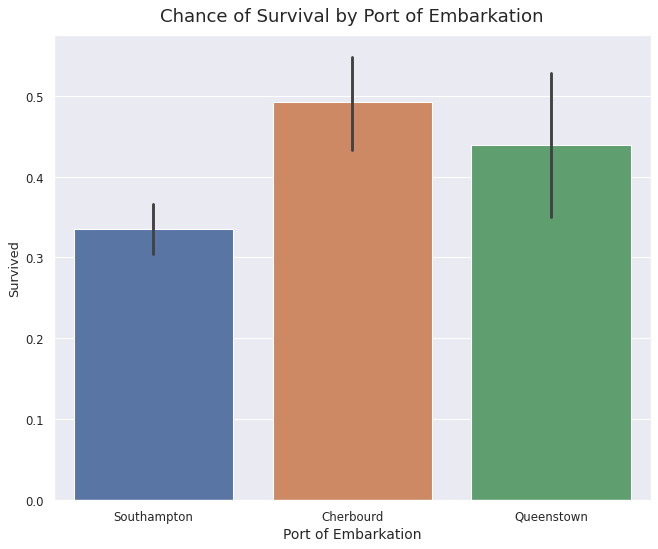

In [ ]:
plt.figure(figsize=(10,8), dpi=77)
sns.barplot(x="Embarked", y="Survived", data=df)
plt.title('Chance of Survival by Port of Embarkation', size=17, pad=13)
plt.xlabel('Port of Embarkation', size=13)
plt.xticks([0, 1, 2],['Southampton', 'Cherbourd', 'Queenstown'])
plt.show()

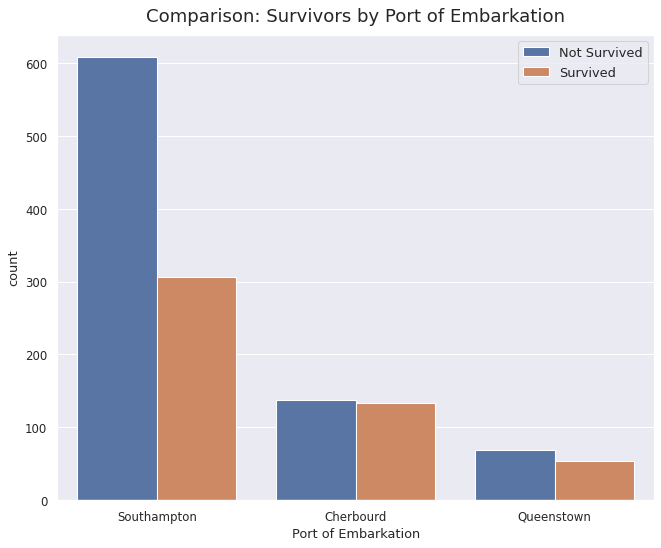

In [ ]:
plt.figure(figsize=(10,8), dpi=77)
sns.countplot(x=df['Embarked'],hue=df['Survived'])
plt.title("Comparison: Survivors by Port of Embarkation", size=17, pad=13)
plt.xlabel('Port of Embarkation')
plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 12})
plt.xticks([0, 1, 2],['Southampton', 'Cherbourd', 'Queenstown'])
plt.show()

 What do you undersend/find from the analysis above (section 2.3.2.8)? Write in your own words in this cell.

Write below:

From this section we find that the people who embarked from Cherbourd have the higest rate of survive and the people came from Southampton survive the less. But in the middle ground we have Queenstown.
The ratio of surviving is higher than not surviving for the people who came from Cherbourd. The ratio of not surviving is little bit higher than surviving for the people who came from Queenstown. The ratio of not surviving is much higher than surviving for the people who embarked from Southampton.

##### 2.3.2.9 Average Age of Passengers with Siblings and  Parents or Children

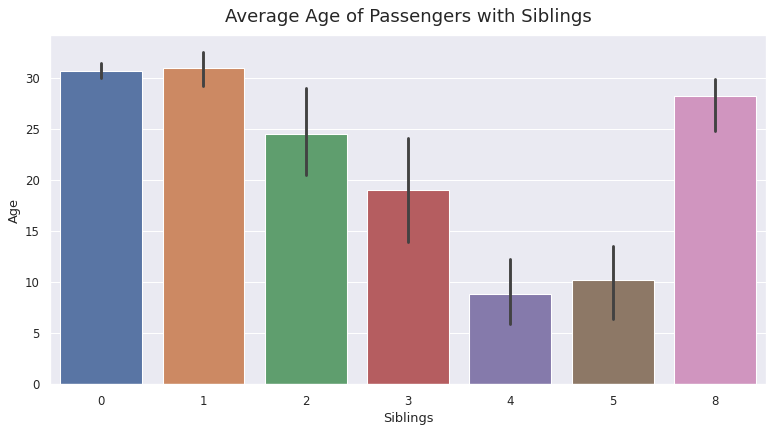

In [ ]:
plt.figure(figsize=(12,6), dpi=77)
sns.barplot(x="SibSp", y="Age", data=df)
plt.title('Average Age of Passengers with Siblings', size=17, pad=13)
plt.xlabel('Siblings')
plt.show()

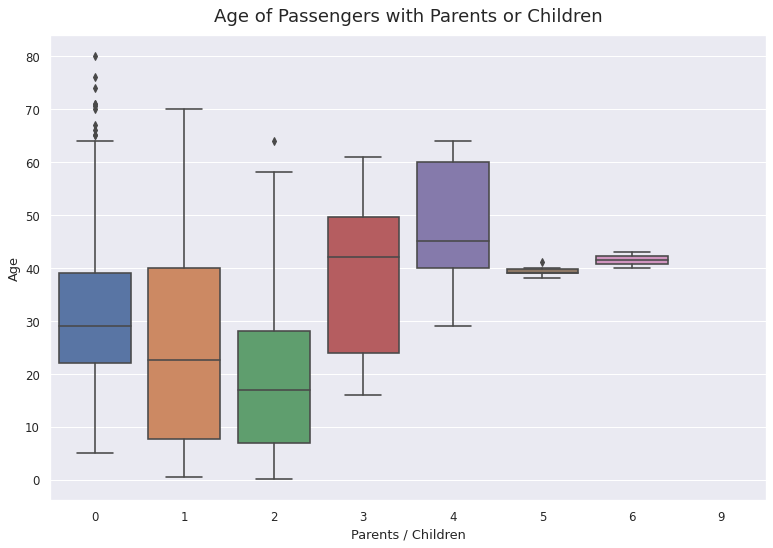

In [ ]:
plt.figure(figsize=(12,8), dpi=77)
sns.boxplot(x="Parch", y="Age", data=df)
plt.title('Age of Passengers with Parents or Children', size=17, pad=13)
plt.xlabel('Parents / Children')
plt.show()

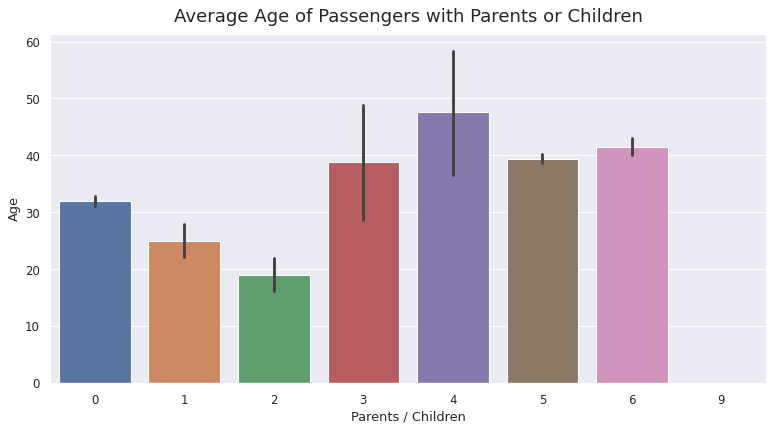

In [ ]:
plt.figure(figsize=(12,6), dpi=77)
sns.barplot(x="Parch", y="Age", data=df)
plt.title('Average Age of Passengers with Parents or Children', size=17, pad=12)
plt.xlabel('Parents / Children')
plt.show()

 What do you undersend/find from the analysis above (section 2.3.2.9)? Write in your own words in this cell.

Write below:

We have got to know this analysis that how differents types of ages passensgers are with siblings and parents/children in the dataset.About 33% ages of passengers with 0 and 1 siblings are more than others. Passengers with 4 siblings are at the least level about 8%. At the boxplot there are some outliers for passengers with 0 parents/children aged 20 to 40.besides there so many passengers with different ages. Passengers with 5 and 6 parents/childrens are in so small range of ages.Highest range of the age is passengers with 1 parents/children about 8 to 40. We also see that passengers with 9 children/parents are not available in the dataset.On the contrary,the highest level of aged passengers are with 4 parents/children.

##### 2.3.2.10 Age of Passengers for each Ticket Class

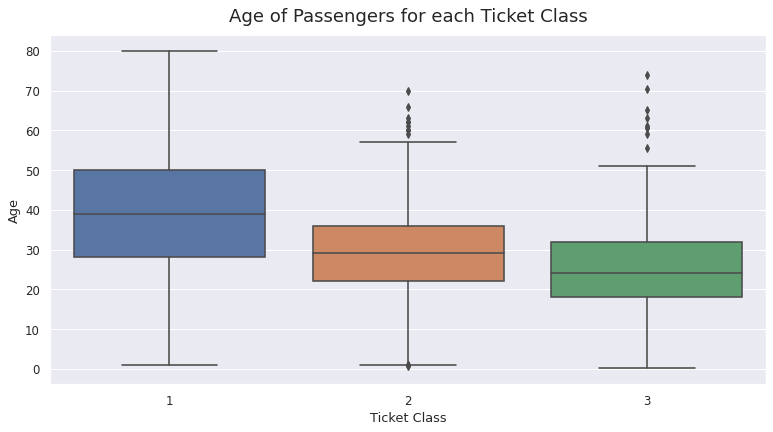

In [ ]:
plt.figure(figsize=(12,6), dpi=77)
sns.boxplot(x="Pclass", y="Age", data=df)
plt.title('Age of Passengers for each Ticket Class', size=17, pad=13)
plt.xlabel('Ticket Class')
plt.show()

 What do you undersend/find from the analysis above (section 2.3.2.10)? Write in your own words in this cell.

Write below:

 In this analysis, 2nd and 3rd class passengers have some outliers. The 2nd class passengers are in 20 to 40 age ranges and 3rd class passengers are in 15 to 35 age ranges. The highest age range of passengers are 1st class.



##### 2.3.2.11 Comparing multiple columns

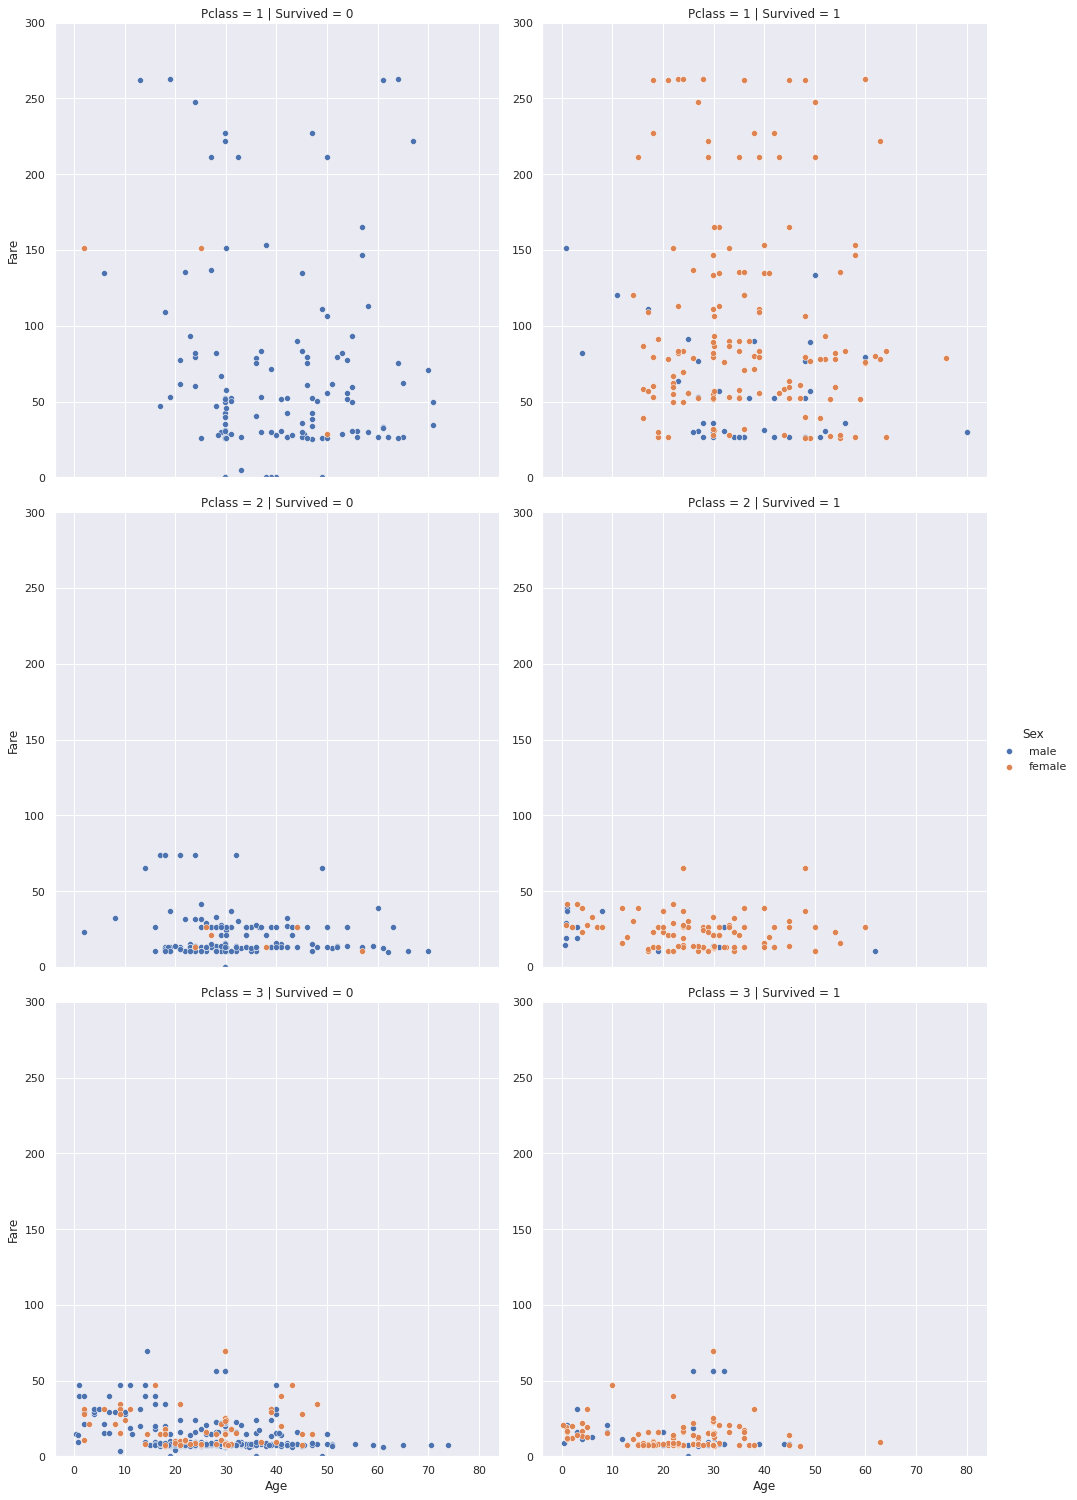

In [ ]:
# Comparison of Pclass, Age, Sex and Survivors
g = sns.FacetGrid(df, col='Survived', row='Pclass', sharey=False, ylim=(0,300), hue='Sex', height=7)
g.map_dataframe(sns.scatterplot, x='Age', y='Fare')
g.set_axis_labels('Age', 'Fare')
g.add_legend()
# g.set_titles(col_template='', row_template='')
plt.show()

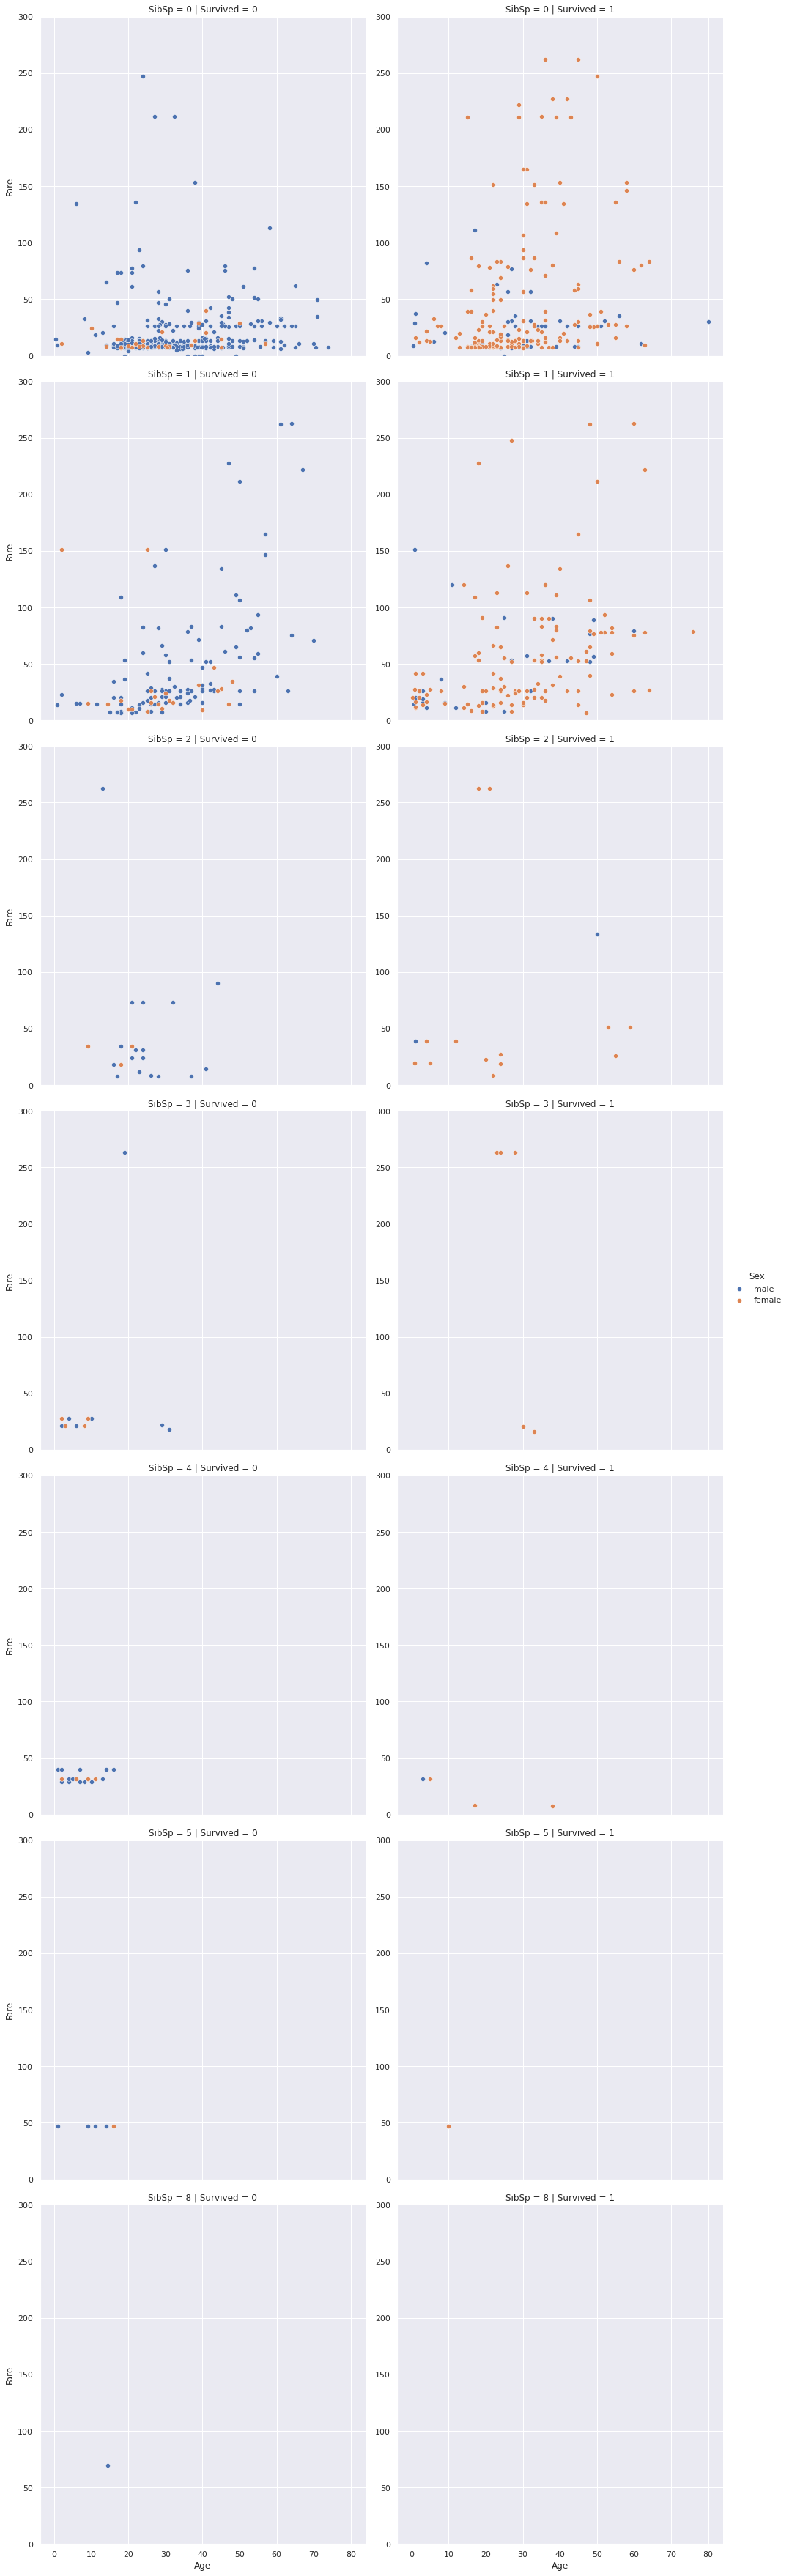

In [ ]:
# Comparison of Parch, Age, Sex and Survivors
g = sns.FacetGrid(df, col='Survived', row='SibSp', sharey=False, ylim=(0,300), hue='Sex', height=7)
g.map_dataframe(sns.scatterplot, x='Age', y='Fare')
g.set_axis_labels('Age', 'Fare')
g.add_legend()
# g.set_titles(col_template='', row_template='')
plt.show()

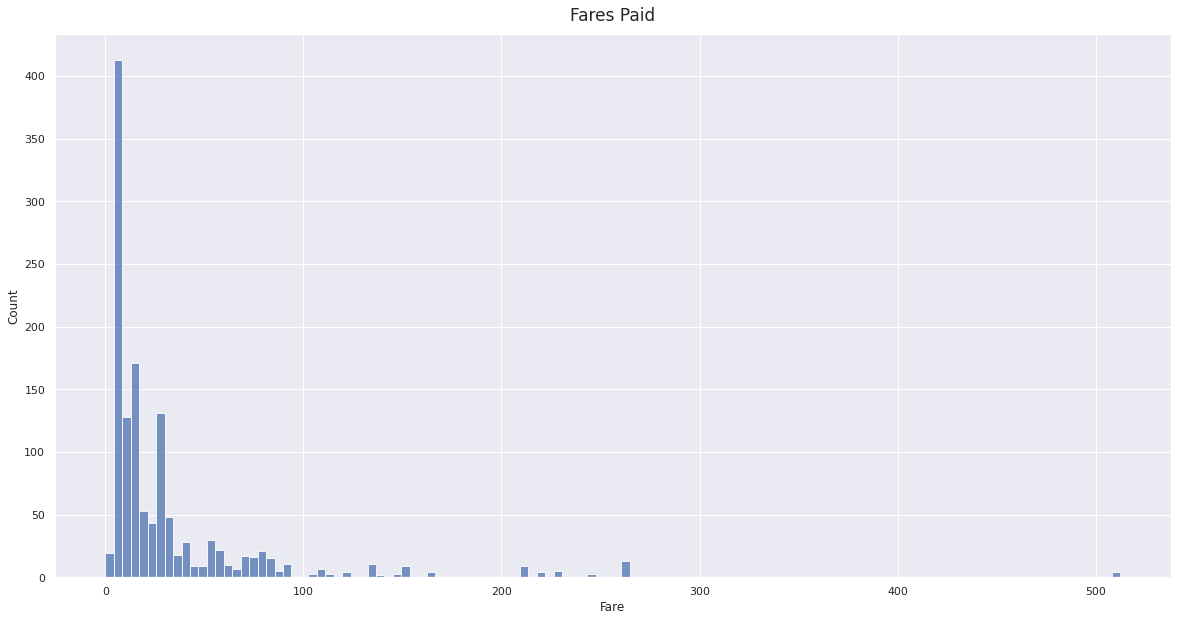

In [ ]:
plt.figure(figsize=(20,10))
sns.histplot(df.Fare)
plt.title('Fares Paid', size=17, pad=13)
plt.show()

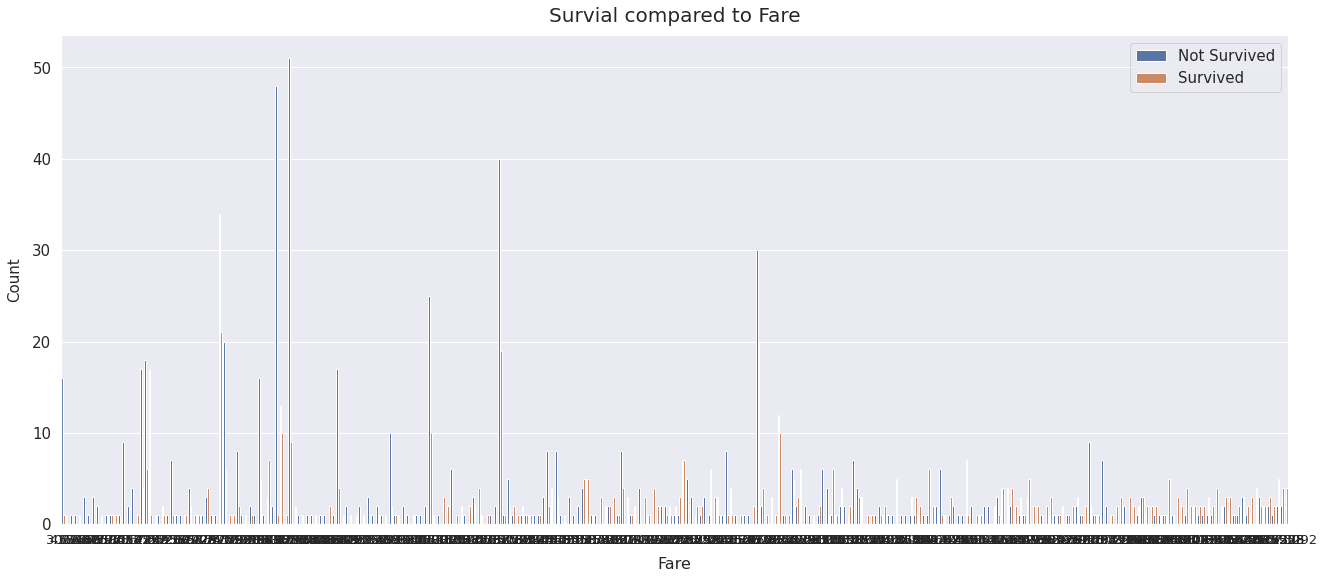

In [ ]:
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Fare', hue='Survived', data=df)
plt.xlabel('Fare', size=16, labelpad=10)
plt.ylabel('Count', size=15, labelpad=10)
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=15)
plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Survial compared to Fare', size=20, y=1, pad=13)
plt.show()

 What do you undersend/find from the analysis above (section 2.3.2.11)? Write in your own words in this cell.

Write below:

In this analysis shows that the comparison between Pclass and Fare.Also shows that how much Fare have given whose are with siblings/spouses. How many are fairely paid, this is also shown in this analysis.

## 3. Data Preprocessing

Explain your data preprocessing steps including filling null values, dropping duplicates, encoding, dimensionality reduction etc. whichever is applicable. Appropriate data preprocessing can hugely impact your model’s performance.

For encoding categorical variables you can use pandas (get_dummies).

Convert categorical variable into dummy/indicator variables.

Learn More:


https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

**Examples**


In [ ]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
train_data["Age"].fillna(train_data["Age"].mean(), inplace=True)
train_data["Cabin"].fillna(train_data["Cabin"].mode()[0], inplace=True)

In [ ]:
train_data=pd.get_dummies(train_data,columns=['Name','Sex','Ticket','Cabin','Embarked'])

**Now use the given dataset and perform the data preprocessing steps:**

In [ ]:
# Code Here (Add as many cells as you need)
from sklearn.model_selection import train_test_split
X = train_data.drop(columns=["Survived"])    
Y = train_data.Survived
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=100)

## 4.	Machine Learning Models



1.   Develop machine learning models. 
2.   You may try changing different parameters to obtain better training 
accuracy.
3. At least two models (with different parameters)



Provide a brief description of the machine learning models you used. (Provide a detailed description of their parameter)

Don’t copy-paste directly from the Internet! Write in your own words.

### 4.1 Use Logistic regression to build your ML model for the Titanic dataset.

At least two models (with different parameters). Hints: use the default parameters for one model and tuned-up (intuitively) parameter for improving accuracy.


In [ ]:
# Code Here (Add as many cells as you need)
from sklearn.linear_model import LogisticRegression
lc=LogisticRegression()

lc.fit(X_train,Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
pred1=lc.predict(X_test)
pred1

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0])

In [ ]:
lc.score(X_test,Y_test)

0.7761194029850746

**From this section we are trying to predict persons the person is he/she alive or not.O for not survived and 1 for survived.**

### 4.2 First analyse the 'Advertising dataset' as like you have observed in Titanic dataset. Then, use Linear Regression to build your ML model for the Advertising dataset. 

At least two models (with different parameters). Hints: use the default parameters for one model and tuned-up (intuitively) parameter for improving accuracy. 


In [ ]:
df1=pd.read_csv('/content/drive/MyDrive/Projects/advertising.csv')
df1

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [ ]:
df1.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X = df1.drop(columns=["Sales"])    
Y = df1.Sales
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=100)

In [ ]:
from sklearn.linear_model import LinearRegression
lc=LinearRegression()
lc.fit(X_train,Y_train)

pred2=lc.predict(X_test)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
Rclf=RandomForestRegressor()
Rclf.fit(X_train,Y_train)
pred3=Rclf.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print("Result on Linear Regression:\n")
print("R2_Score:\t\t",r2_score(Y_test,pred2))
print("Mean_absolute_error:\t",mean_absolute_error(Y_test,pred2))
print("Mean_squared_error\t",mean_squared_error(Y_test,pred2))
print("\n")
print("Result on Random Forest Regression:\n")
print("R2_Score:\t\t",r2_score(Y_test,pred3))
print("Mean_absolute_error:\t",mean_absolute_error(Y_test,pred3))
print("Mean_squared_error\t",mean_squared_error(Y_test,pred3))
print("\n")

Result on Linear Regression:

R2_Score:		 0.8655979373420272
Mean_absolute_error:	 1.227818356658941
Mean_squared_error	 2.6360765623280655


Result on Random Forest Regression:

R2_Score:		 0.9374154093630322
Mean_absolute_error:	 0.9259166666666659
Mean_squared_error	 1.227494349999998




Using regression algorithm we are trying to predict the ammount of sales here. Above from two different algorithms Random Forest gives more accurate resukt than Linear Regression

## 5.	Performance Evaluation and Discussion

Use charts and figures appropriately to visualize and compare the performance of different models (for both the dataset, provide seperate comparison). Add as many cells as you need.

\

Analyze the performance of the models and provide your hypothesis behind their performance, e.g. Why are some models performing better than others? Provide appropriate reasoning for your hypothesis. 

Here Random Forest works better than Linear Regression. Because even for simple problem it creates tree and try to find the solutions. Using multiple decision trees to solve problem and it is also faster than Linear Regression. So it works better than Linear Regression

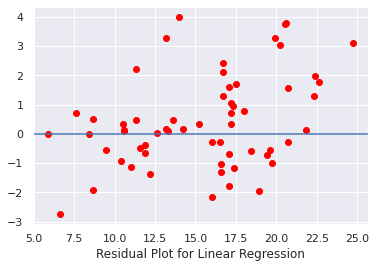

In [ ]:
residue_lreg = Y_test - pred2
plt.scatter(Y_test,residue_lreg, c = "red")
plt.xlabel("Residual Plot for Linear Regression")
plt.axhline(y = 0)

### **Write Here**

# Part B (Analysis of the Assignment dataset you have collected (Choose One dataset))



## 1. Provide an overview of the Dataset including the Dataset Characteristics and Exploratory Data Analysis, Data Preprocessing, and performance of different models. 

BigMart Sales Data: Predicting the outlet sale price

This dataset is collected from Kaggle where certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store. Using this model, we will try to understand the properties of products and stores which play a key role in increasing sales

Dataset Description:

Number of columns in the dataset: 12

Columns in the dataset: • ItemIdentifier ---- Unique Product ID
• ItemWeight ---- Weight of product
• ItemFatContent ---- Whether the product is low fat or not
• ItemVisibility ---- The % of the total display area of all products in a store allocated to the particular product
• ItemType ---- The category to which the product belongs
• ItemMRP ---- Maximum Retail Price (list price) of the product
• OutletIdentifier ---- Unique store ID
• OutletEstablishmentYear ---- The year in which the store was established • OutletSize ---- The size of the store in terms of ground area covered
• OutletLocationType ---- The type of city in which the store is located
• OutletType ---- Whether the outlet is just a grocery store or some sort of Supermarket • ItemOutletSales ---- sales of the product in t particular store. This is the
outcome variable to be predicted.

There are some missing values in the dataset and before creating our model we are going to process those null values to achieve better result.

We are going to run 3 different ML model to identify which perfome well.

## 2.	Dataset Characteristics and Exploratory Data Analysis

In this section, introduce your dataset. Mention number of rows, columns and other characteristics. Provide the histograms of data distribution and correlations among the variable with a suitable discussion. Try to stand out and be creative. (Add as many cells as you need)

### 2.1 Load, View Data and Show Analysis on Rows and Columns 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df=pd.read_csv('/content/drive/MyDrive/Projects/bigmart.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
#dataset row,col number
df.shape

(8523, 12)

In [ ]:
#dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff190b98490>]],
      dtype=object)

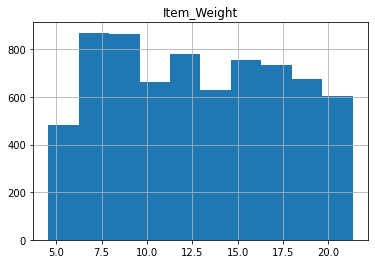

In [ ]:
df.hist(column='Item_Weight',figsize=[6,4])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff1913700d0>]],
      dtype=object)

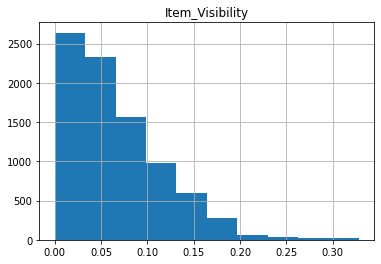

In [ ]:
df.hist(column='Item_Visibility',figsize=[6,4])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff1913b8f40>]],
      dtype=object)

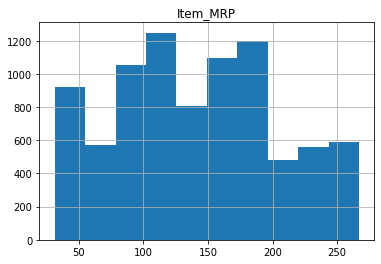

In [ ]:
df.hist(column='Item_MRP',figsize=[6,4])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff19134be20>]],
      dtype=object)

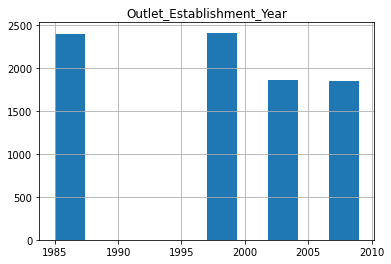

In [ ]:
df.hist(column='Outlet_Establishment_Year',figsize=[6,4])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff190d65400>]],
      dtype=object)

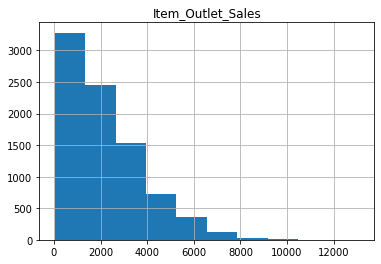

In [ ]:
df.hist(column='Item_Outlet_Sales',figsize=[6,4])

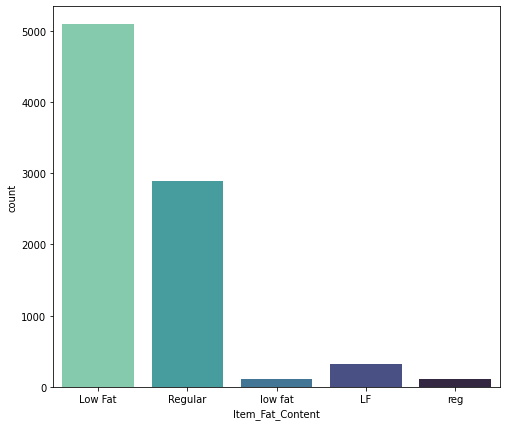

In [ ]:
plt.figure(figsize=(8,7))
sns.countplot(x='Item_Fat_Content',data=df,palette='mako_r')
plt.show()

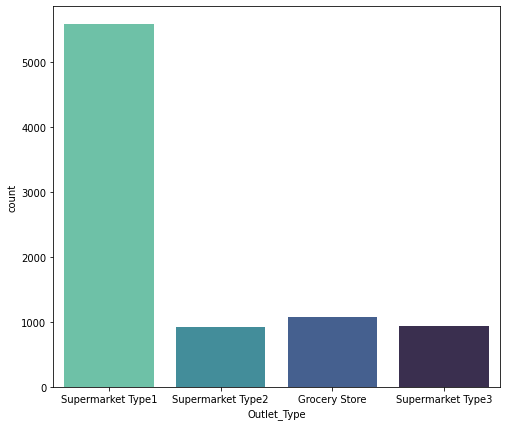

In [ ]:
plt.figure(figsize=(8,7))
sns.countplot(x='Outlet_Type',data=df,palette='mako_r')
plt.show()

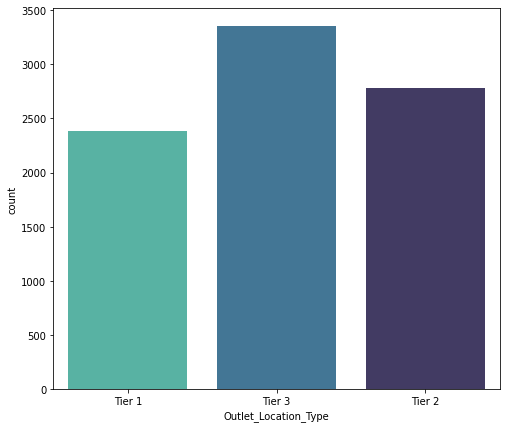

In [ ]:
plt.figure(figsize=(8,7))
sns.countplot(x='Outlet_Location_Type',data=df,palette='mako_r')
plt.show()


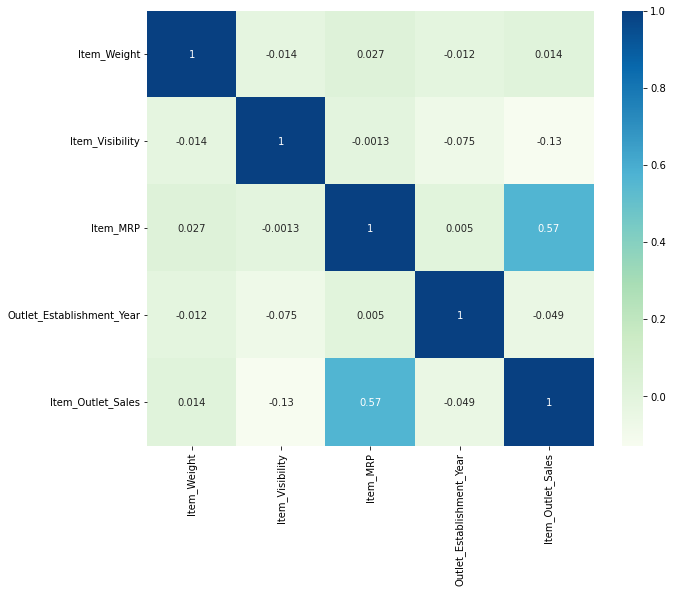

In [ ]:
#correlations
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cmap='GnBu', annot=True)
plt.show()

### 2.2 Data Cleaning









#### Identifying duplicate values


In [ ]:
df.duplicated().sum()

0

#### Identifying missing values


In [ ]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]
for feature in features_with_na:
  print(feature, np.round(df[feature].isnull().mean(),2),'% missing values')


Item_Weight 0.17 % missing values
Outlet_Size 0.28 % missing values


#### Visualisation of missing data


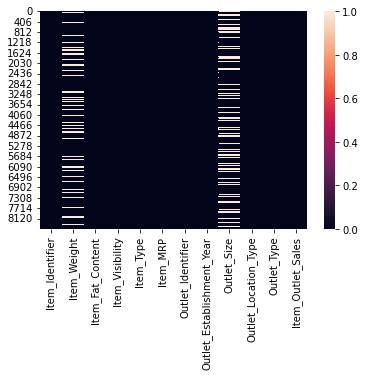

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(df.isna())
plt.show()

#### Dealing with missing values (How would you deal with missing values?) (Columns with missing data)



1.   Do analysis using plots

2.   Provide an appropriate discussion




In [ ]:
df.columns[df.isnull().any()]

Index(['Item_Weight', 'Outlet_Size'], dtype='object')

### 2.3 Analysing Patterns using Visualisations

#### Visualization of column correlation. Also, plot Heat Map

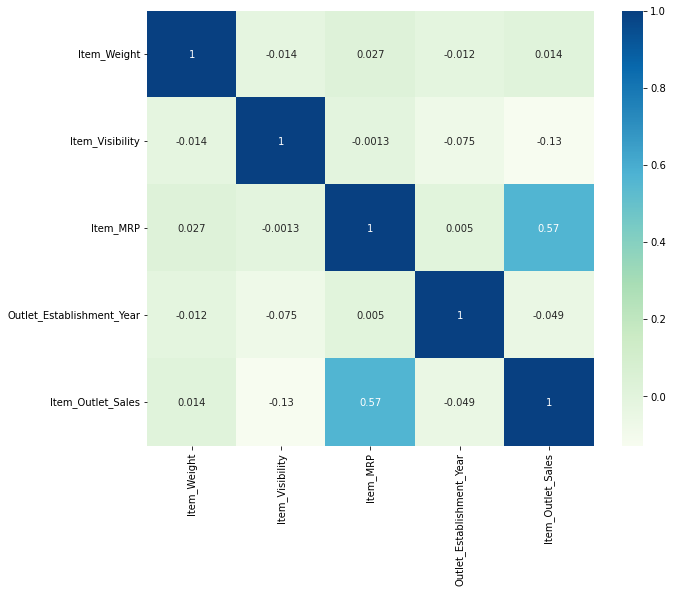

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cmap='GnBu', annot=True)
plt.show()

#### Visualization of Linear Relationships of columns (Continuous Numerical Variables)

In [ ]:

cat_col=[]
for x in df.dtypes.index:
  if df.dtypes[x]=='object':
    cat_col.append(x)

for col in cat_col:
  print(col)
  print(df[col].value_counts())
  print()

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
O

In [ ]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
df['Item_Fat_Content'].value_counts()


Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

#### Visualization of column relationships (Categorical Variables)



1.   Comparing two columns using different types of plots
2.   Comparing multiple columns using different types of plots



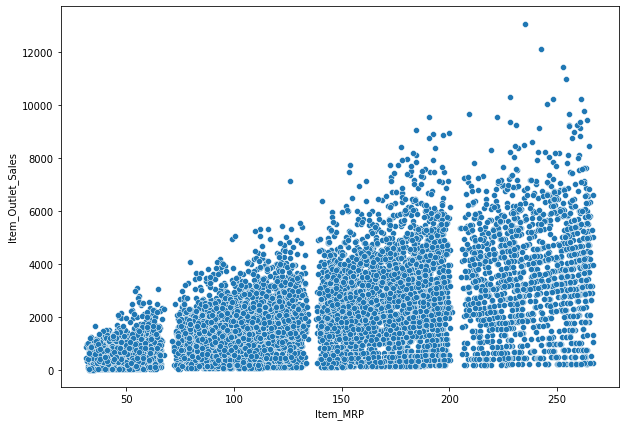

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',data=df)
plt.show()

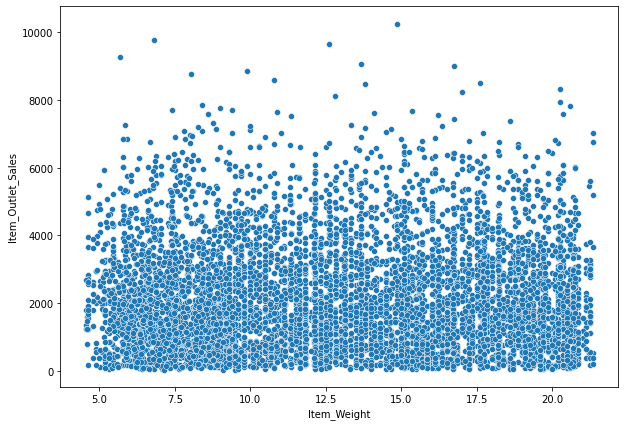

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='Item_Weight',y='Item_Outlet_Sales',data=df)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


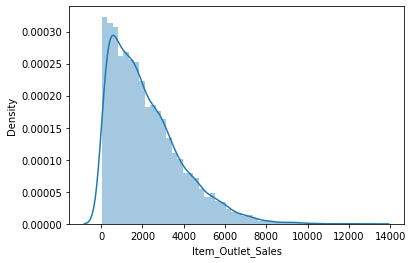

In [ ]:
sns.distplot(df['Item_Outlet_Sales'])

Since this plot doesn't follow normal distribution but to achive better accuracy it's necessary that data follow normal distribution.So We can apply a log function here to make a normal distribution or close to normal distribution.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


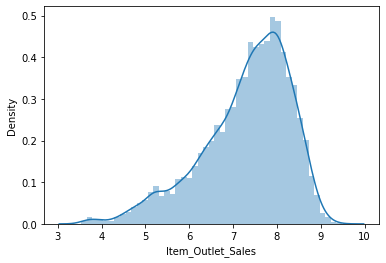

In [ ]:
df['Item_Outlet_Sales']=np.log(1+df['Item_Outlet_Sales'])
sns.distplot(df['Item_Outlet_Sales'])

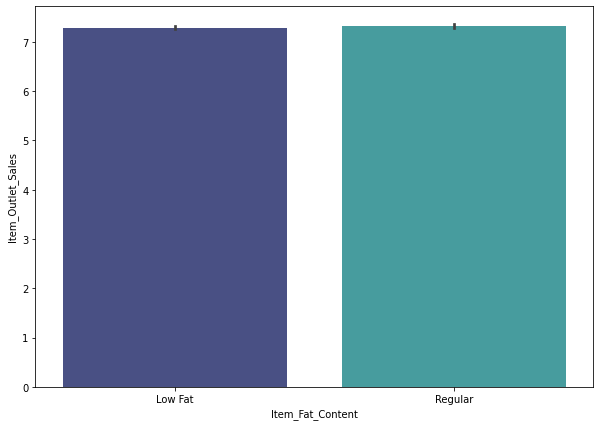

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=df, palette='mako')
plt.show()

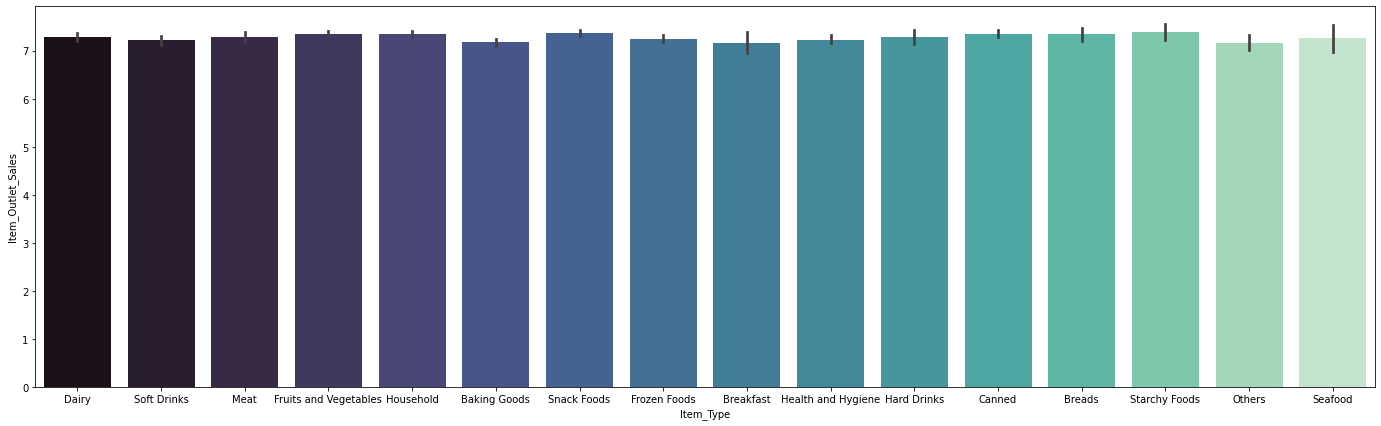

In [ ]:
plt.figure(figsize=(24,7))
sns.barplot(x='Item_Type',y='Item_Outlet_Sales',data=df, palette='mako')
plt.show()

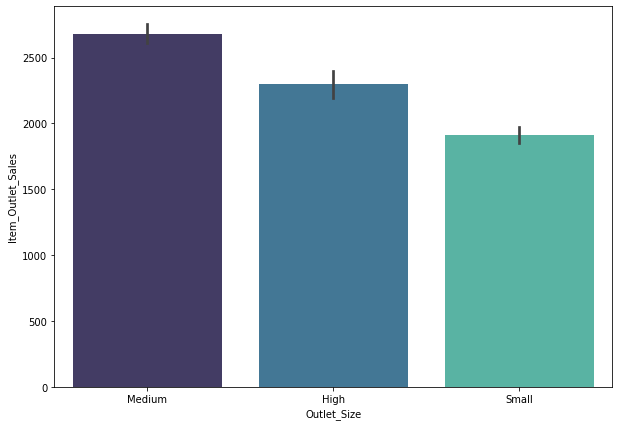

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=df, palette='mako')
plt.show()

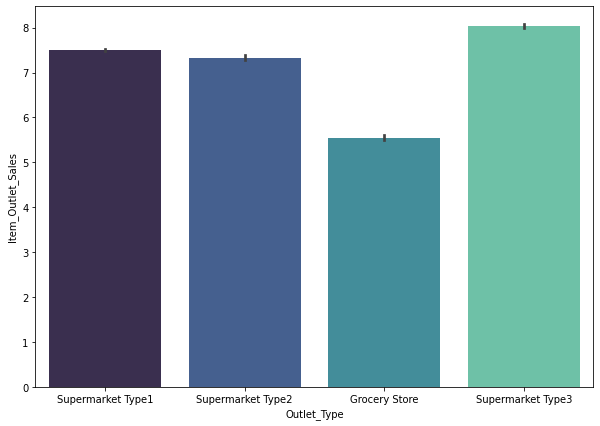

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(x='Outlet_Type',y='Item_Outlet_Sales',data=df, palette='mako')
plt.show()

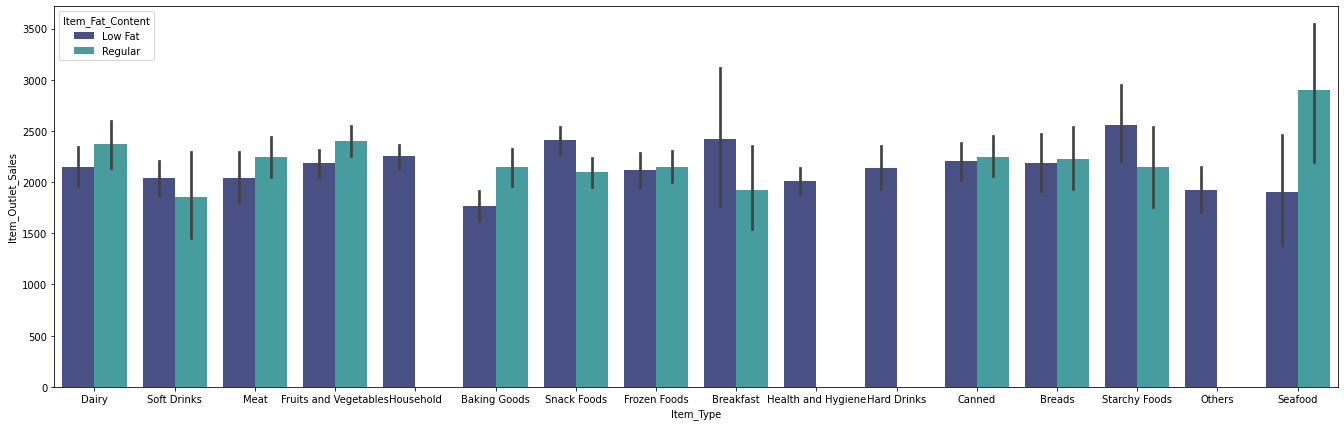

In [ ]:
plt.figure(figsize=(23,7))
sns.barplot(x='Item_Type',y='Item_Outlet_Sales',hue='Item_Fat_Content',data=df, palette='mako')
plt.show()

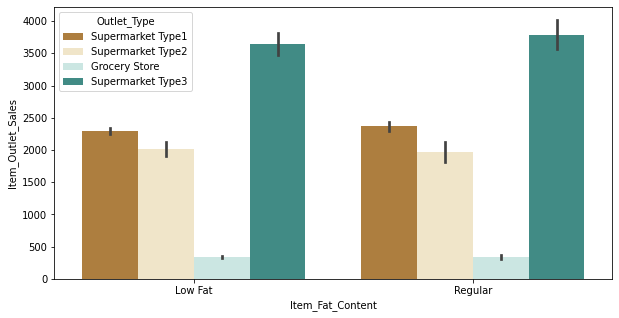

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='Item_Fat_Content', y='Item_Outlet_Sales',data=df,hue='Outlet_Type',palette='BrBG')
plt.show()

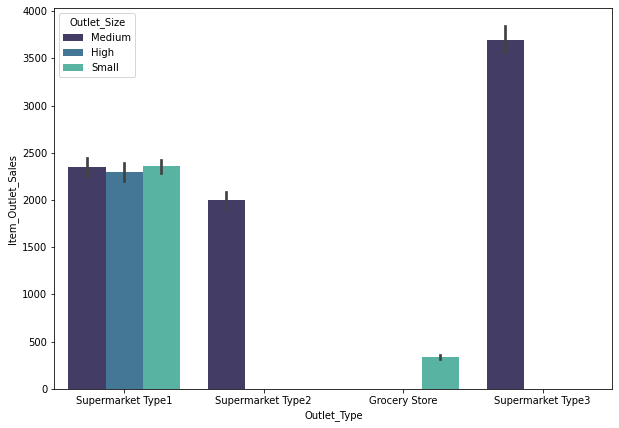

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(x='Outlet_Type',y='Item_Outlet_Sales',hue='Outlet_Size',data=df, palette='mako')
plt.show()

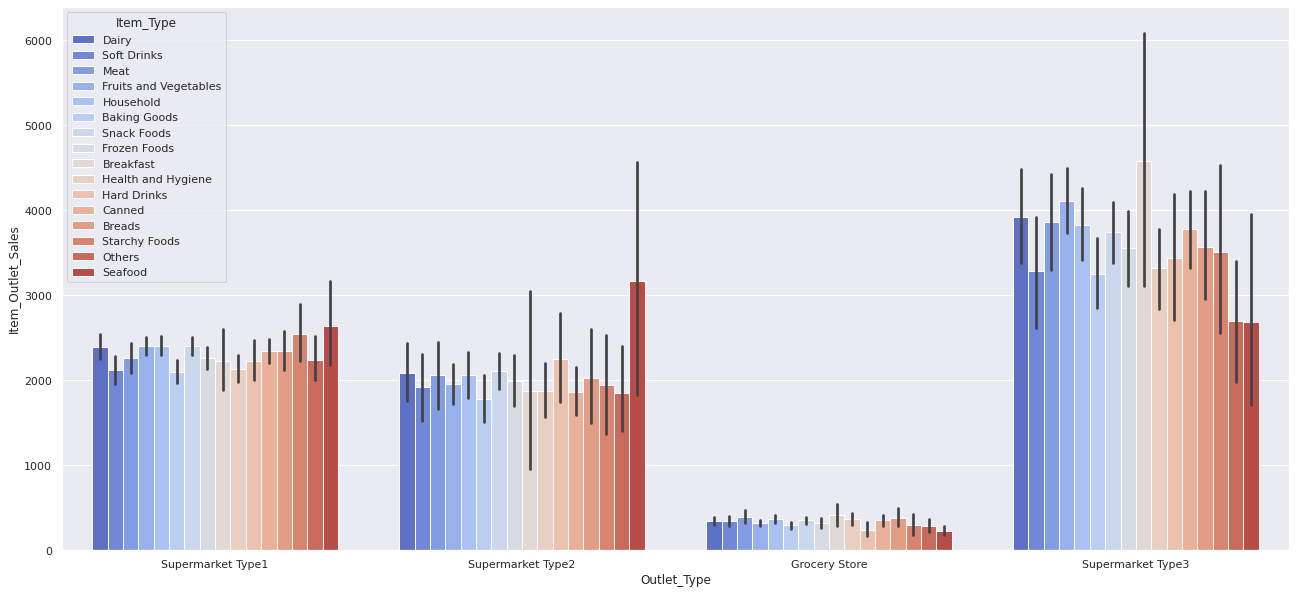

In [ ]:
plt.figure(figsize=(22,10))
sns.barplot(x='Outlet_Type',y='Item_Outlet_Sales',hue='Item_Type',data=df, palette='coolwarm')
plt.show()

## 3. Data Preprocessing

Explain your data preprocessing steps including filling null values, dropping duplicates, encoding, dimensionality reduction etc. whichever is applicable. Appropriate data preprocessing can hugely impact your model’s performance.

In [ ]:
df["Item_Weight"].fillna(df["Item_Weight"].mean(), inplace=True)
df["Outlet_Size"].fillna(df["Outlet_Size"].mode()[0], inplace=True)

Item_Weight is a Numerical value, So we filled it with mean value.
Outlet_Size is a Categorigal value,so we fill those with mode value.

In [ ]:
df.loc[:, 'Item_Visibility'].replace([0],[df['Item_Visibility'].mean()],inplace=True)

Item visibility's mean shows that 0. If the item is visible then it can not be zero. So we replace those 0 values with mean

In [ ]:
df.drop(['Item_Identifier'],axis=1,inplace=True)
df.drop(['Outlet_Identifier'],axis=1,inplace=True)

Item_Identifier and Outlet_Identifier is identifier here,so we can drop these.

In [ ]:
df=pd.get_dummies(df,columns=['Item_Fat_Content','Item_Type','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type'])

Using one hot encoding we incode these features as they are categorical.

### **Write Here**

## 4.	Machine Learning Models



1.   Develop machine learning models. 
2.   You may try changing different parameters to obtain better training 
accuracy.
3. At least two models (with different parameters)



Provide a brief description of the machine learning models you used. (Provide a detailed description of their parameter)

Don’t copy-paste directly from the Internet! Write in your own words.

**Linear Regression**:Linear regression is a supervised learning algorithm that simulates a
mathematical relationship between variables and makes predictions for
continuous or numeric variables.It allow us to understand the strength of relationships between variables. It will take a paremeter X_test and predeict a number and from that number we can match it with Y_test and know how good our accuracy is.

**Support Vector Regression**:SVR goal is to find the hyperplane in a high-dimensional space that maximally separates the data points into two classes, with the goal of minimizing the prediction error. It works with two paremeter Xtest and Ytest and calculate the accuracy.

**Random Forest Regression:** This algorithm creates and uses multiple decision trees to solve a single problem.It will go in a certian depth of a tree and try to find the solution.This algorithm also works with only one paremeter X_Test and guess a number.From that we can calculate how accurate our result is.

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=["Item_Outlet_Sales"])    
Y = df.Item_Outlet_Sales 
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=100)


In [ ]:
from sklearn.linear_model import LinearRegression
lc=LinearRegression()
lc.fit(X_train,Y_train)

LinearRegression()

In [ ]:
pred1=lc.predict(X_test)

In [ ]:
from sklearn.svm import SVR
vec=SVR(gamma='auto')
vec.fit(X_train,Y_train)


SVR(gamma='auto')

In [ ]:
pred2=vec.score(X_test,Y_test)
pred2

0.6318807641894215

In [ ]:
from sklearn.ensemble import RandomForestRegressor
Rclf=RandomForestRegressor()
Rclf.fit(X_train,Y_train)

RandomForestRegressor()

In [ ]:
pred3=Rclf.predict(X_test)
pred3

array([7.94679941, 8.02147407, 8.59944616, ..., 5.86394553, 7.05250344,
       6.81001731])

### **Write Here**

## 5.	Performance Evaluation and Discussion

Use charts and figures appropriately to visualize and compare the performance of different models. (Add as many cells as you need)

\

Analyze the performance of the models and provide your hypothesis behind their performance, e.g. Why are some models performing better than others? Provide appropriate reasoning for your hypothesis. 

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print("Result on Linear Regression:\n")
print("R2_Score:\t\t",r2_score(Y_test,pred1))
print("Mean_absolute_error:\t",mean_absolute_error(Y_test,pred1))
print("Mean_squared_error\t",mean_squared_error(Y_test,pred1))
print("\n")
print("Result on Support Vector Regression:\n")
print("R2_Score:\t\t",pred2)
print("Result on RAndom Forest Regression:\n")
print("R2_Score:\t\t",r2_score(Y_test,pred3))
print("Mean_absolute_error:\t",mean_absolute_error(Y_test,pred3))
print("Mean_squared_error\t",mean_squared_error(Y_test,pred3))
print("\n")

Result on Linear Regression:

R2_Score:		 0.711862596732623
Mean_absolute_error:	 0.4143797835646594
Mean_squared_error	 0.28854085679565106


Result on Support Vector Regression:

R2_Score:		 0.6318807641894215
Result on RAndom Forest Regression:

R2_Score:		 0.6988151615992773
Mean_absolute_error:	 0.42635332893693645
Mean_squared_error	 0.30160656110779754




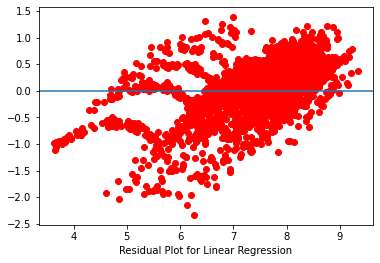

In [ ]:
residue_lreg = Y_test - pred1
plt.scatter(Y_test,residue_lreg, c = "red")
plt.xlabel("Residual Plot for Linear Regression")
plt.axhline(y = 0)

From above result we can see that Linear Regression model gives us the better result than the other two model. Because I think this model is easy to implement and train quickly than other two algorithms. Thats why i think it workks better than other two model